## Convolutional Neural Networks (CNNs)
A CNN is a neural network model that is specialized in working with images or videos in a 2D dimension. A CNN is used for processing the images or videos in a grid. So in general CNN is used for series data and pattern recognition.

To make a CNN there has to be different layers, these layers is the foundation for creating a functional CNN model. The layers also called convolutional layers, these layers is what gives the entire networks it's name. One of the important terms when talking about CNN's is filters. Filters is what gives a CNN the functionality for pattern recognition.

`Convolutional layers` these layers are what applies the different filters to the different neurons data. These layers are linear operations that can apply 1 or more filters to a neuron at once, so the different neurons have different biases. Applying a convolutional layer to neuron will multiply the pixels from the neuron data with the bias from all the filters. After applying the filters the sum of region that the filter is applied to is made. When this has happened to all the regions, there will automatically generate a new matrix where every region is made of a sum. This new matrix is used by the network to learn the different features that are in the dataset. These layers can help determine a pattern in the dataset.

`Fully Connected layers` is a combination multiple convolutional and pooling layers. A fully connected layer is a true copy of a real neural network, where every neuron from a previous layer is connected to every neuron in a new layer.

`Pooling layers` is used to reduce the image into smaller regions. This is done by segmenting the image into groups of pixels. There is different ways of doing pooling. There is max pooling which takes the max value from a group of the neighbouring regions pixels and inputs it into the feature map instead of its own value. The other pooling method is called average pooling. When using average pooling it takes the average value of all the regions in the local region it is in. The reason for using pooling is to find the most active regions of pixels and shrink down the dimensions.

`Multiple channels` is often used when working with processing of images or videos. Multiple channels allow the CNN to have different channels for the different color spectrum's. The multiple channels can also be used to create outlines on the different images. Each convolutional filter is applied to every multiple channel independently.

`Activation Functions` is used to teach the model the complex relations between all the features in the data used. Activation functions is non-linear. Some examples on activation functions would be `Relu` or `softmax`.

`Generlization` is used to ensure a models performance with unseen data, so that it does not matter how big the dataset is the model should still be able to perform somewhat decent. We used a stratified k-fold to make sure we had cross-validation on the dataset.

`Learning Curve` can be seen in the plots we have made that illustrates the training loss and accuracy from the different iterations. Training loss measures the performance of the model while doing training. It is possible to see that over time that the training loss gets smaller and the prediction value gets closer to the actual value the longer it trains. The same happens to the accuracy, from start to finish its possible to see it grow closer to a score of 1.

`Code Setup`
- Import libraries needed
- Get data from mnist
- Setup train and test data with reshaping
- Create CNN model
- Initial setup for stratified k-fold
- Setup array to store test accuracy
- For loop that creates the model fits the model
- Plotting the training loss and accuracy
- Printing average score

![model_plot.png](model_plot.png)

`Testing different epochs` we tried a lot of different combinations of epochs, folds and some different layers. however the best score was while using 6 folds and 20 epochs, and the final average score we ended up getting is `0.9927`
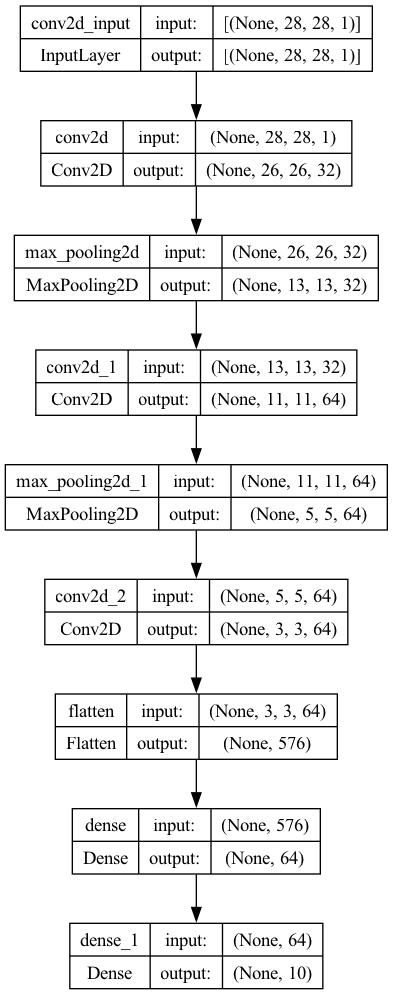

313/313 [==============================] - 1s 3ms/step - loss: 0.0549 - accuracy: 0.9893
Test average accuracy: 0.989300012588501


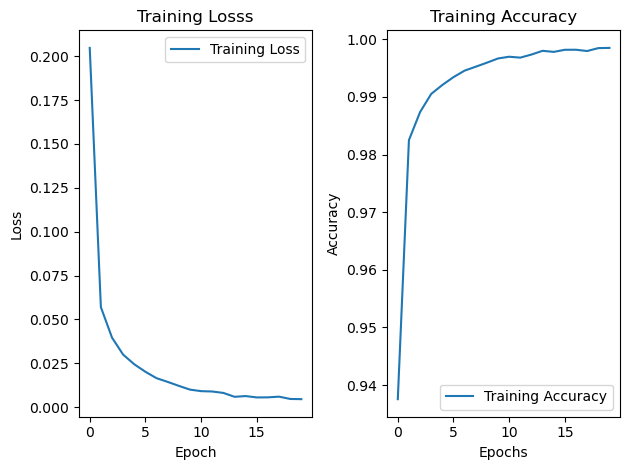

In [1]:
import keras
from keras.utils import plot_model
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

(x_train, y_train ), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255.0
x_test = x_test.reshape((-1,28,28,1)).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

def create():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

folds = 6
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=50)
test_accuracy = []

training_loss = []
training_accuracy = []

for train, val in kfold.split(x_train,y_train.argmax(1)):

    model = create()

    x_train_kfold, x_val_kfold = x_train[train], x_train[val]
    y_train_kfold, y_val_kfold = y_train[train], y_train[val]

    epoch_loss = []
    epoch_accuracy = []

    for epochs in range(20):
        modelhis = model.fit(x_train_kfold, y_train_kfold, epochs=1, batch_size=64, verbose=0)

        epoch_loss.append(modelhis.history['loss'][0])
        epoch_accuracy.append(modelhis.history['accuracy'][0])

    training_loss.append(epoch_loss)
    training_accuracy.append(epoch_accuracy)

    test_loss, test_accuracy = model.evaluate(x_test,y_test)

avg_accuracy = np.mean(test_accuracy)
print(f'Test average accuracy: {avg_accuracy}')

plt.subplot(1, 2, 1)
plt.plot(np.mean(training_loss, axis=0), label='Training Loss')
plt.title('Training Losss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.mean(training_accuracy, axis=0), label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


`Conlusion`
We have worked with CNN's and trained a model in processing images. Throughout the exercise we have tried a lot of different methods of doing processing on images using CNN's. We ended on the final version of our CNN which can maintain a high accuracy when using the MNIST dataset. We have tried different setup of layers, epochs and folds. The final result gave an accuracy of `0.9927`.
